<a href="https://colab.research.google.com/github/TOFWAQ/Kaggle_Challenge/blob/main/TEAM_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
train_link = ('https://raw.githubusercontent.com/TOFWAQ/Train_data/main/train.csv') #overwrite your link directory
train = pd.read_csv(train_link)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test_link = ('https://raw.githubusercontent.com/TOFWAQ/Train_data/main/test.csv') #overwrite your test link directorty
test = pd.read_csv(test_link)
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


<ipython-input-5-fd1669104a64>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)


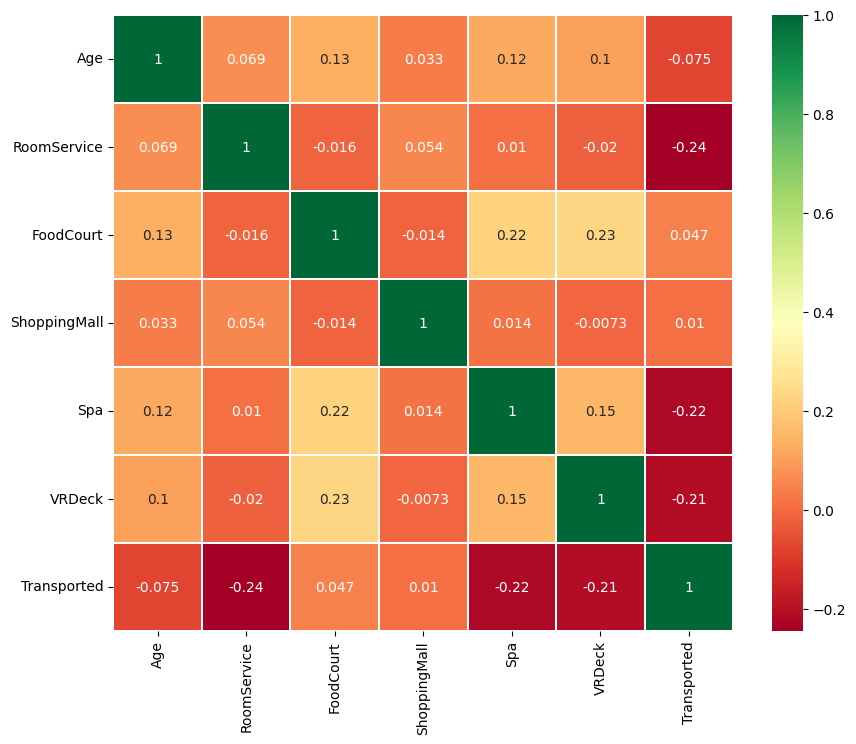

In [5]:
'''Correlation Between The Features'''
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

<ipython-input-6-e46f64c1910b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)


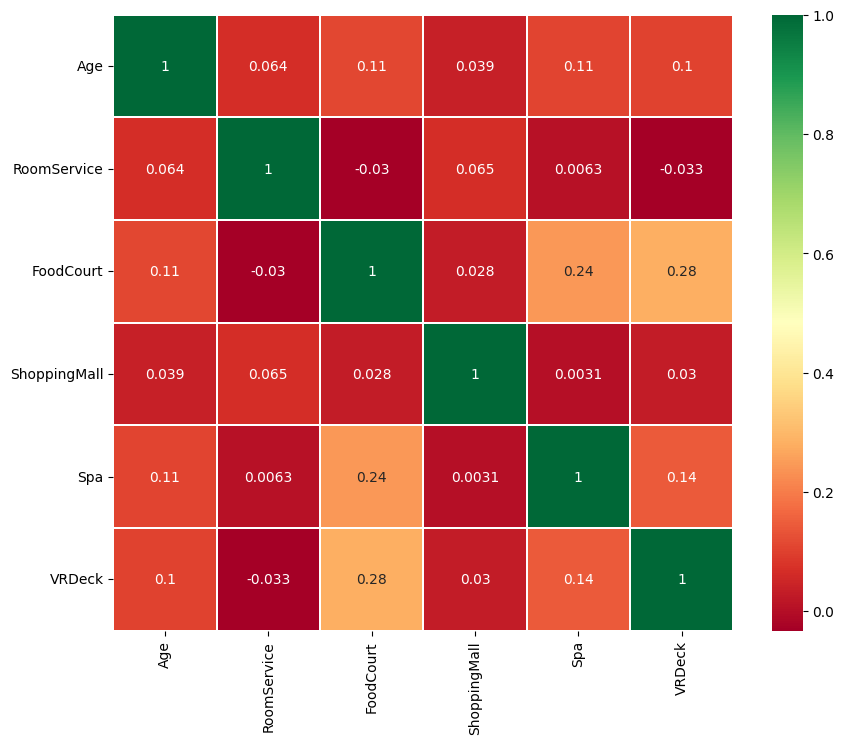

In [6]:
'''Correlation Between The Features'''
sns.heatmap(test.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [7]:
#shape of dataset
train.shape

(8693, 14)

In [8]:
#info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
#Check nulls
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [10]:
# Function to impute missing values in numerical columns with the median
def impute_numerical(df, column_names):
    for column in column_names:
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)

# Function to impute missing values in categorical columns with the mode
def impute_categorical(df, column_names):
    for column in column_names:
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)

# Function to drop columns with more than a certain percentage of missing values
def drop_columns_high_missing(df, threshold=0.5):
    for column in df.columns:
        if df[column].isnull().mean() > threshold:
            df.drop(column, axis=1, inplace=True)

In [11]:
numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = train.select_dtypes(include=['object']).columns

In [12]:
# Impute numerical columns
impute_numerical(train, numerical_columns)

# Impute categorical columns
impute_categorical(train, categorical_columns)

# Drop columns with more than 50% missing values
drop_columns_high_missing(train, threshold=0.5)

In [13]:
# Impute numerical columns
impute_numerical(test, numerical_columns)

# Impute categorical columns
impute_categorical(test, categorical_columns)

# Drop columns with more than 50% missing values
drop_columns_high_missing(test, threshold=0.5)

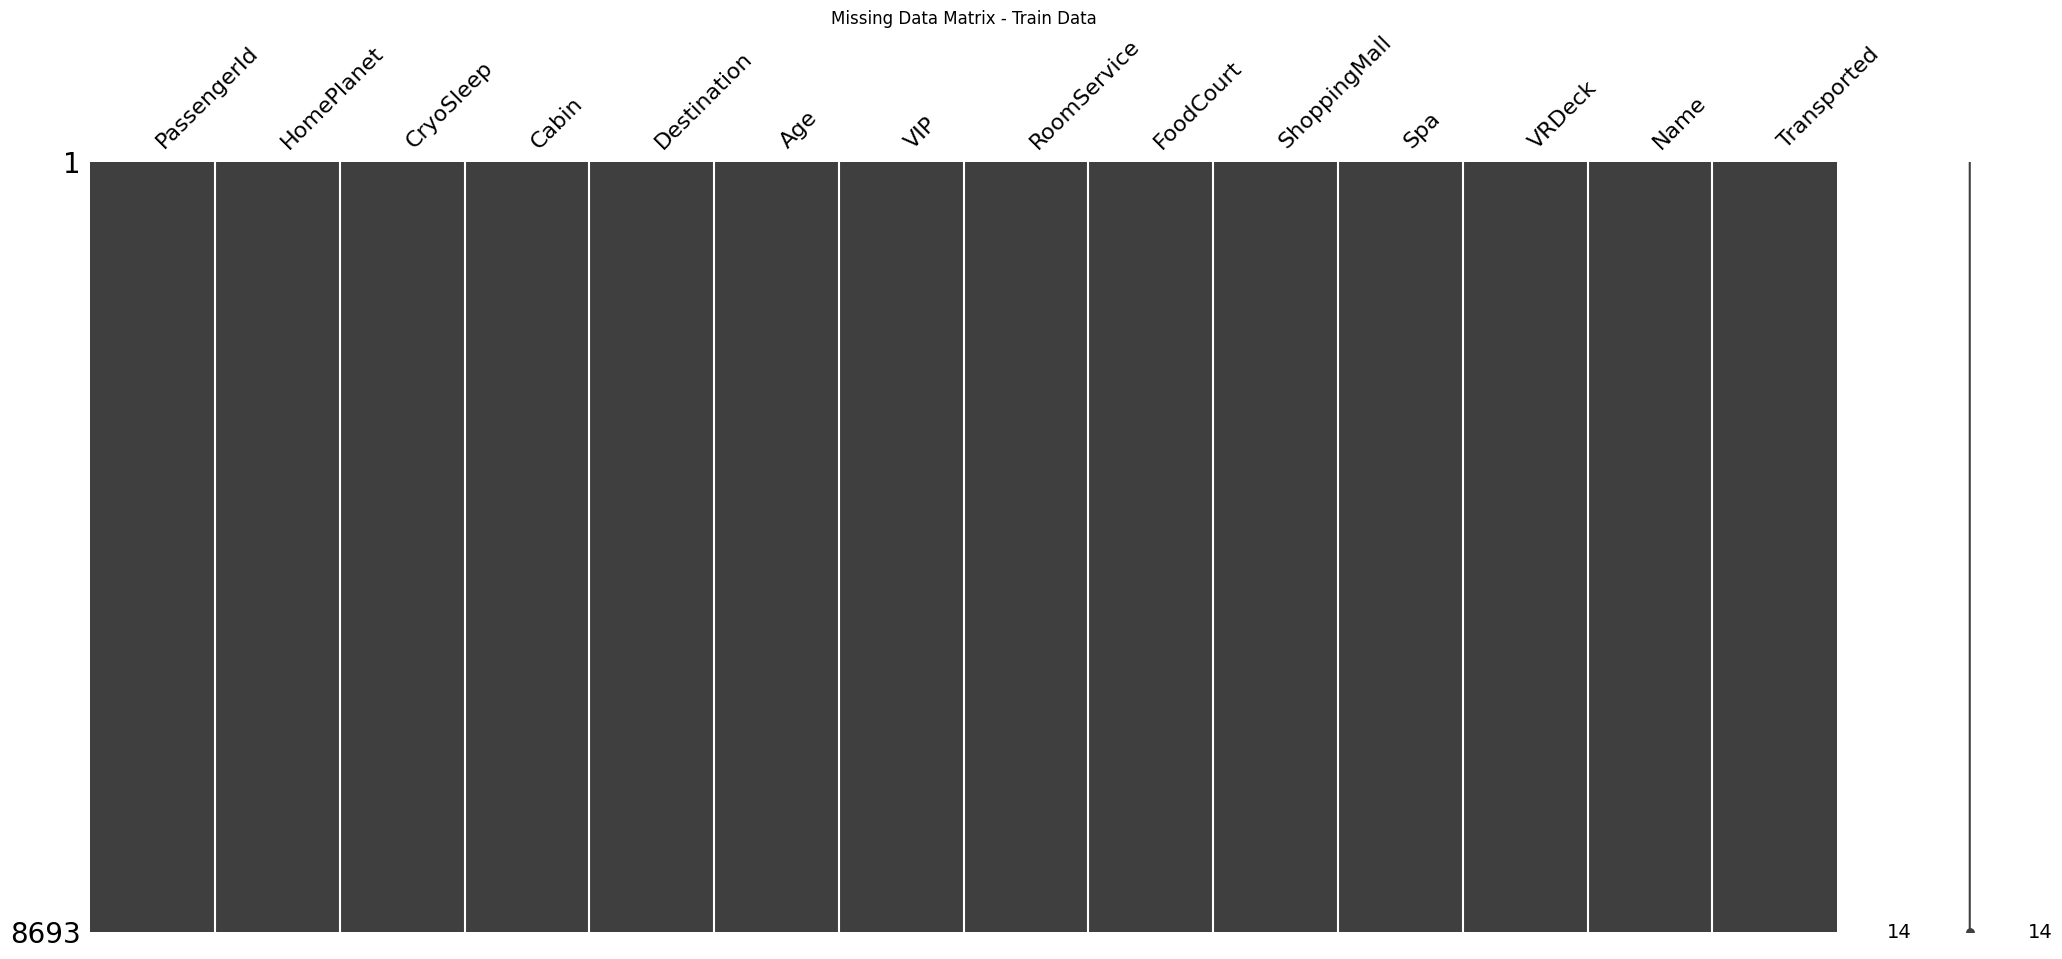

In [14]:
import missingno as msno


# Visualize missing values using missingno
msno.matrix(train)
plt.title('Missing Data Matrix - Train Data')
plt.show()

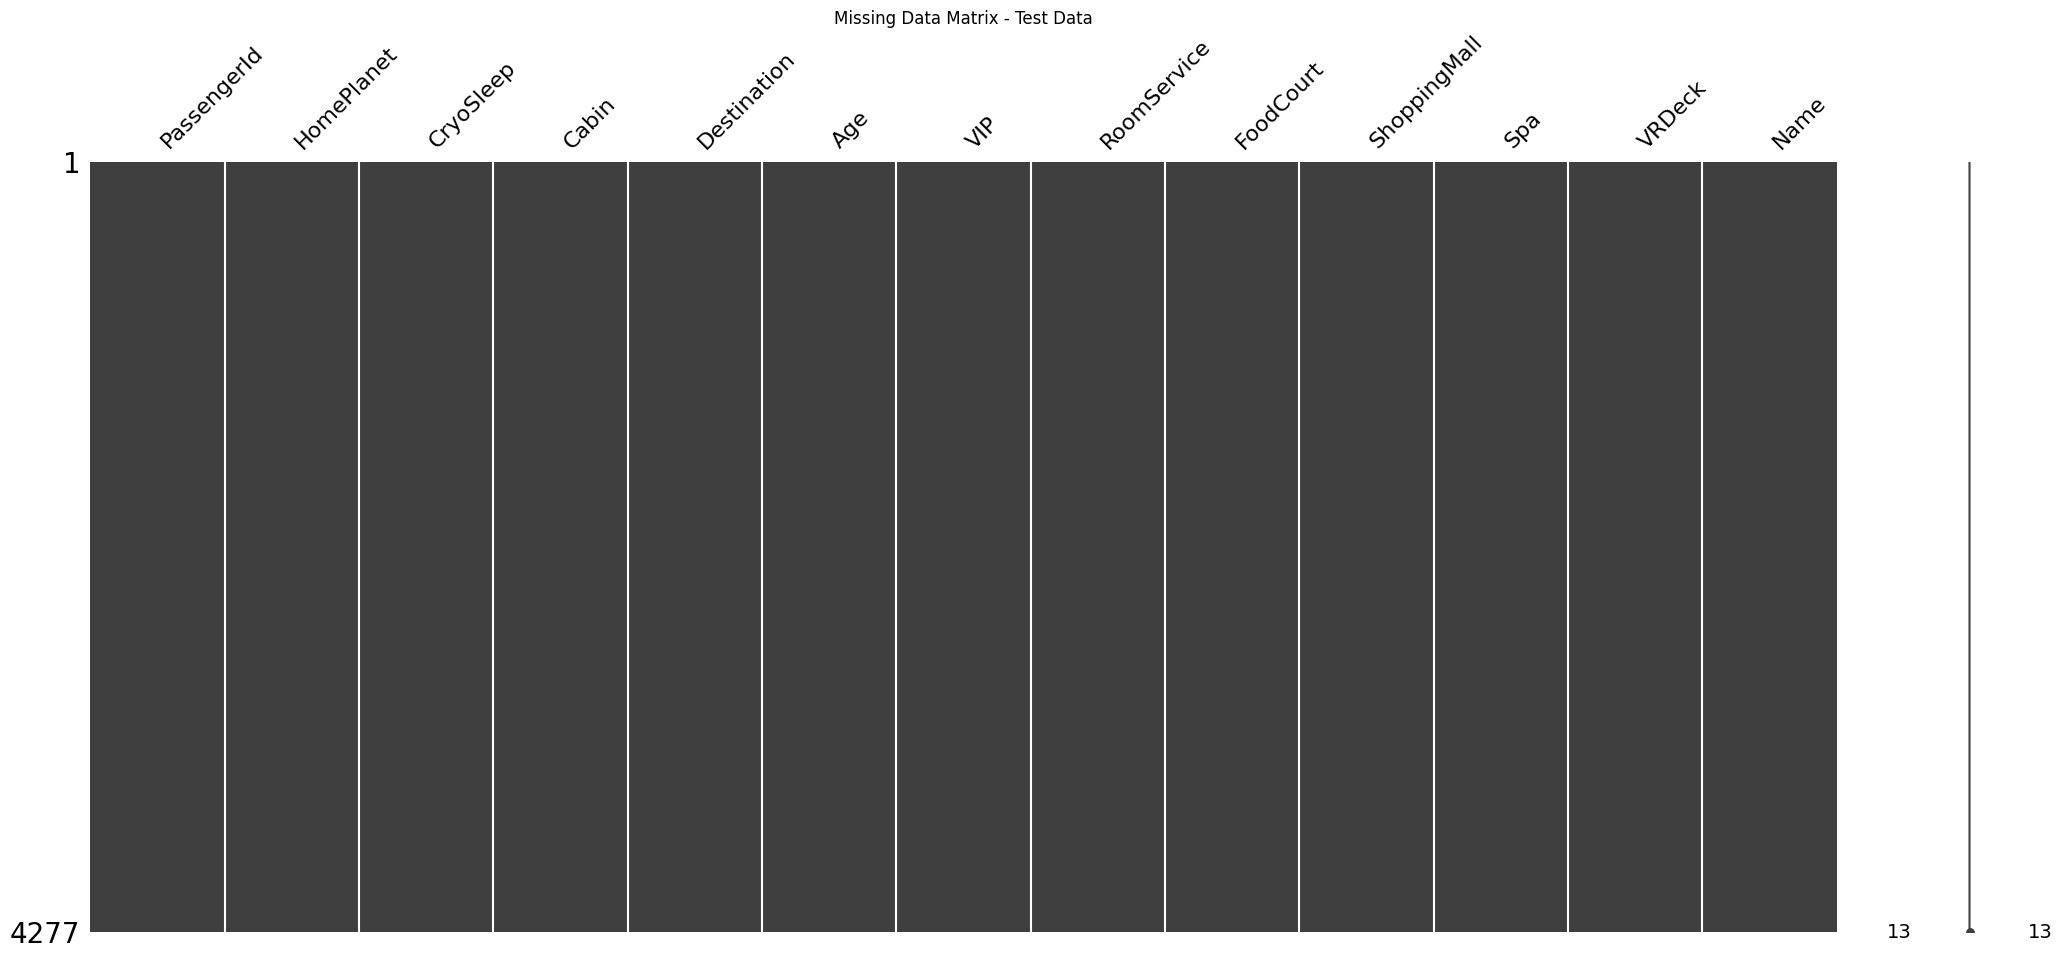

In [15]:
import missingno as msno


# Visualize missing values using missingno
msno.matrix(test)
plt.title('Missing Data Matrix - Test Data')
plt.show()

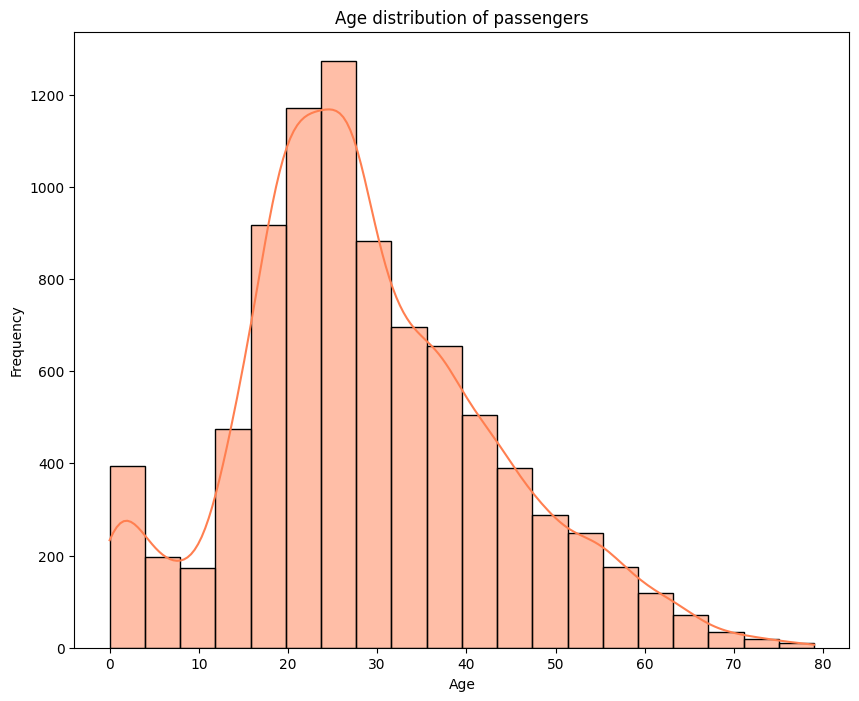

In [16]:
# Age distribution of passengers
plt.figure(figsize=(10,8))
sns.histplot(train['Age'], bins=20, kde=True, color='coral')  # Changed color to 'coral'
plt.title('Age distribution of passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-17-6bb8fb036001>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='HomePlanet', data=train, order=train['HomePlanet'].value_counts().index, palette='dark')


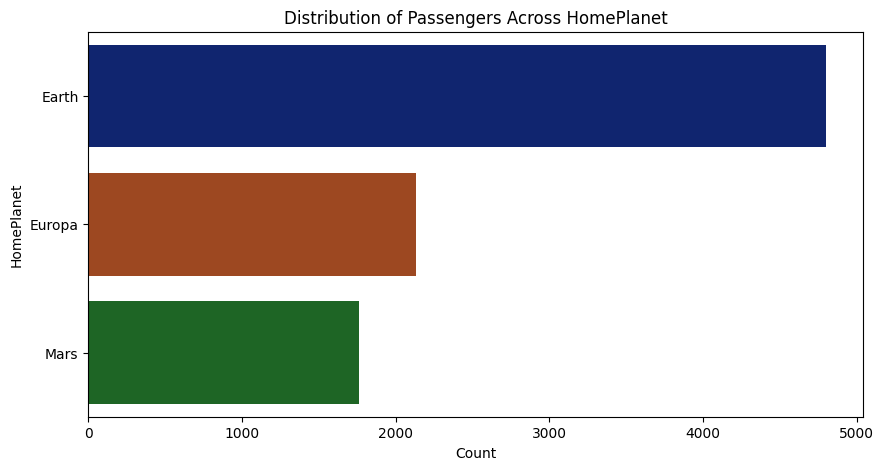

In [17]:
# Distribution of passengers across Homeplanet
plt.figure(figsize=(10,5))
sns.countplot(y='HomePlanet', data=train, order=train['HomePlanet'].value_counts().index, palette='dark')
plt.title('Distribution of Passengers Across HomePlanet')
plt.xlabel('Count')
plt.ylabel('HomePlanet')
plt.show()

<ipython-input-18-2678669b6c10>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Destination', data=train, order=train['Destination'].value_counts().index, palette='bright')


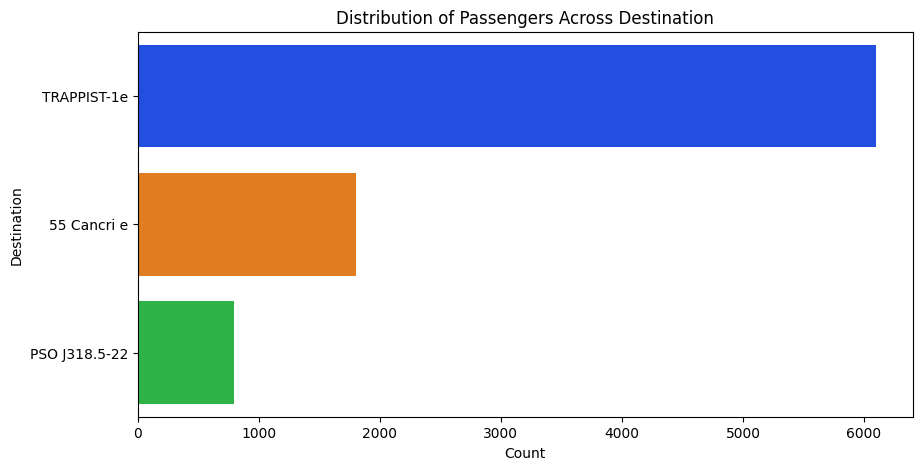

In [18]:
#Destination
plt.figure(figsize=(10,5))
sns.countplot(y='Destination', data=train, order=train['Destination'].value_counts().index, palette='bright')
plt.title('Distribution of Passengers Across Destination')
plt.xlabel('Count')
plt.ylabel('Destination')
plt.show()


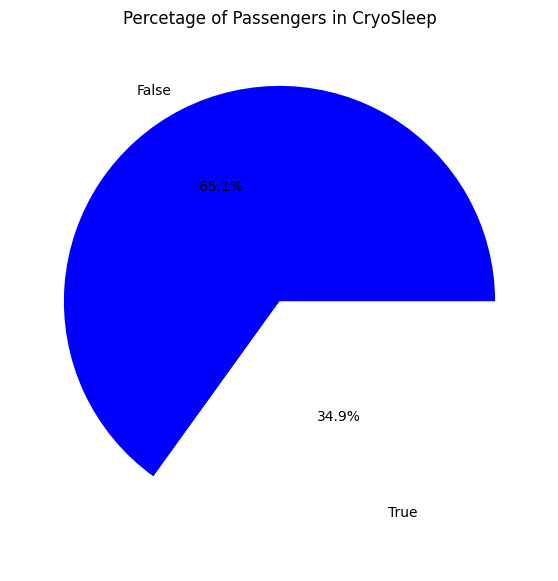

In [19]:
#Percentage of passengers put in Cryosleep vs those not
cryosleep_counts = train['CryoSleep'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(cryosleep_counts, labels=cryosleep_counts.index, autopct='%1.1f%%', colors=['blue', 'white'])
plt.title('Percetage of Passengers in CryoSleep')
plt.show()

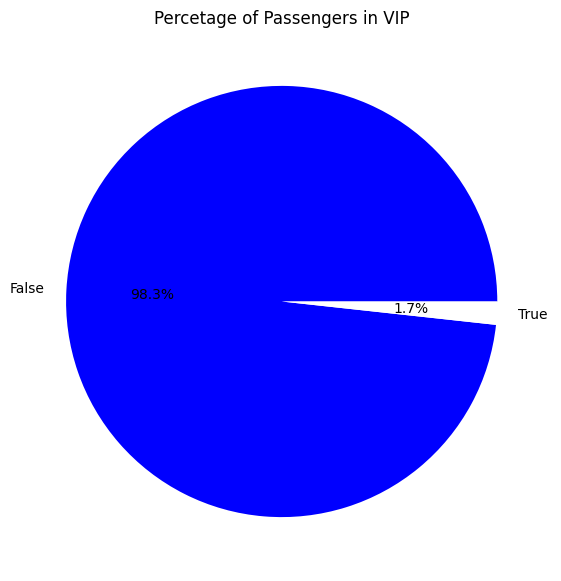

In [21]:
#Percentage of passengers put in Cryosleep vs those not
vip_counts = test['VIP'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(vip_counts, labels=vip_counts.index, autopct='%1.1f%%', colors=['blue', 'white'])
plt.title('Percetage of Passengers in VIP')
plt.show()

In [22]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

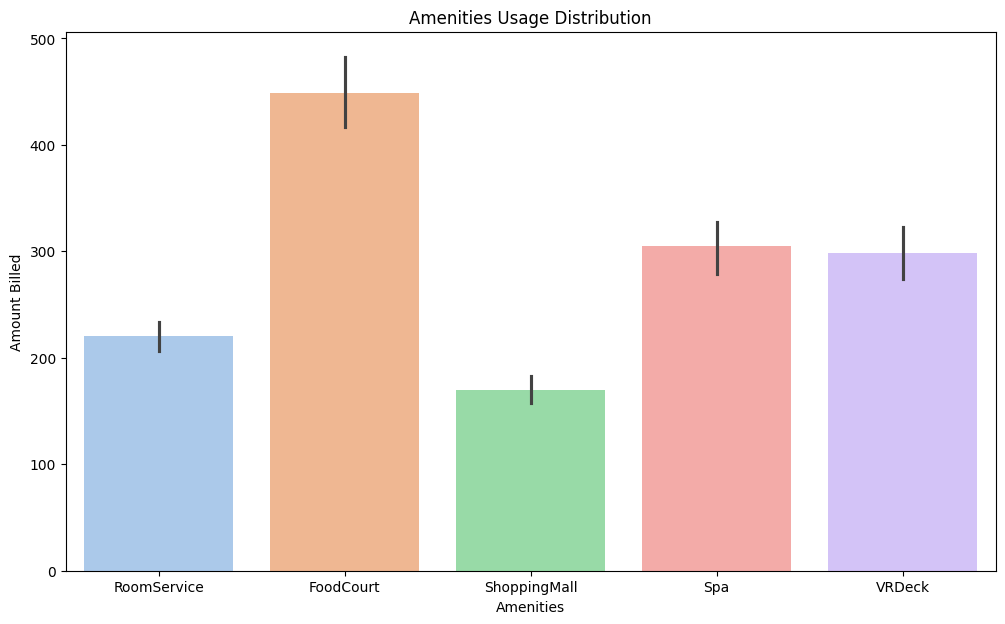

In [23]:
#Amenities usage distribution
amenities = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
plt.figure(figsize=(12,7))
sns.barplot(data=train[amenities], palette='pastel')
plt.title('Amenities Usage Distribution')
plt.ylabel('Amount Billed')
plt.xlabel('Amenities')
plt.show()

### Bivariate Analysis


<ipython-input-24-96a5de5e723a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transported', y='Age', data=train,palette='viridis'),


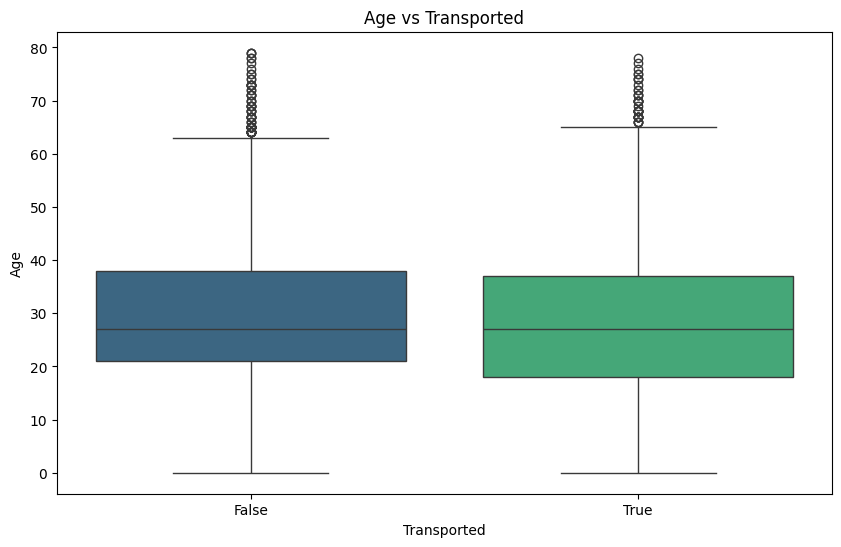

In [24]:
#Age vs Transported
plt.figure(figsize=(10,6))
sns.boxplot(x='Transported', y='Age', data=train,palette='viridis'),
plt.title('Age vs Transported')
plt.xlabel('Transported')
plt.ylabel('Age')
plt.show()

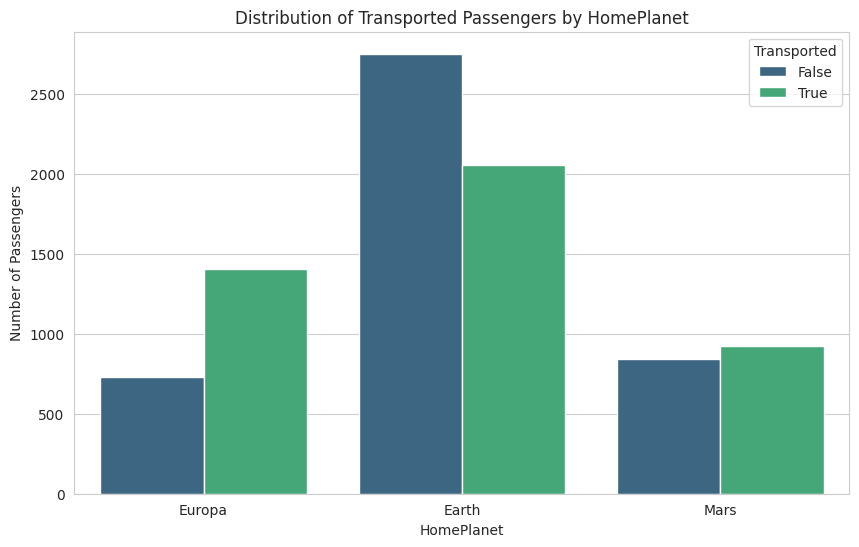

In [25]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create a figure with specified size
plt.figure(figsize=(10, 6))

# Create a count plot with 'HomePlanet' on the x-axis and the 'Transported' column for hue
sns.countplot(data=train, x='HomePlanet', hue='Transported', palette='viridis')

# Set the title and labels of the plot
plt.title('Distribution of Transported Passengers by HomePlanet')
plt.xlabel('HomePlanet')
plt.ylabel('Number of Passengers')

# Display the plot
plt.show()

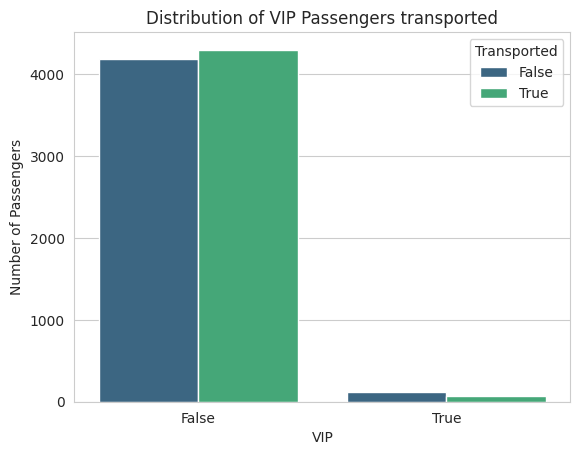

In [26]:
# Create a count plot with 'HomePlanet' on the x-axis and the 'Transported' column for hue
sns.countplot(data=train, x='VIP', hue='Transported', palette='viridis')

# Set the title and labels of the plot
plt.title('Distribution of VIP Passengers transported')
plt.xlabel('VIP')
plt.ylabel('Number of Passengers')

# Display the plot
plt.show()

#### Multivariate Analysis

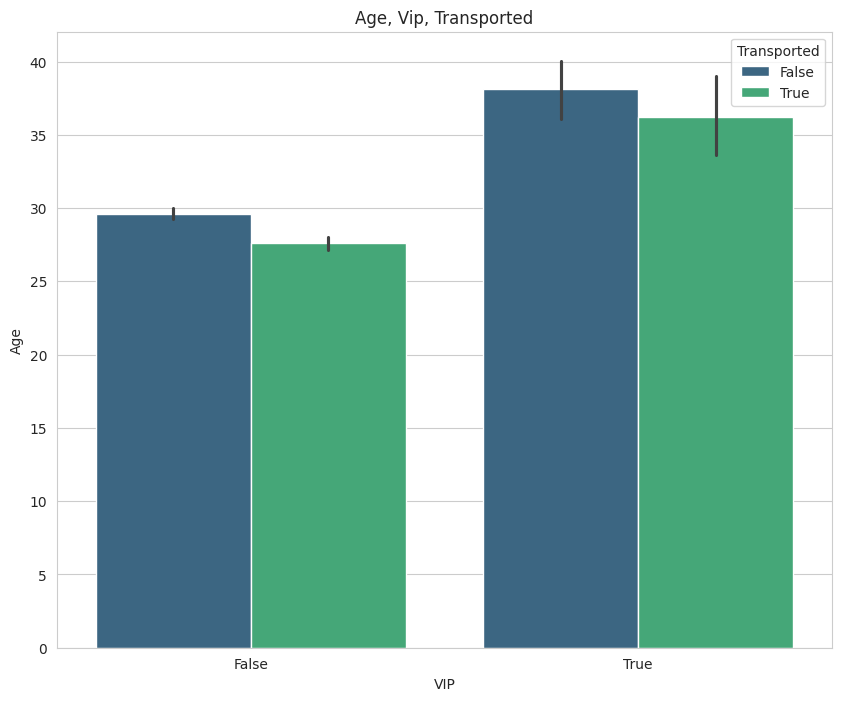

In [27]:
#AGe, VIP, TRansported
plt.figure(figsize=(10,8))
sns.barplot(x='VIP', y='Age', hue='Transported', data=train, palette='viridis')
plt.title('Age, Vip, Transported')
plt.xlabel('VIP')
plt.ylabel('Age')
plt.show()

<ipython-input-28-8d32daf866d1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Transported', y=amenity, data=train, palette='viridis')
<ipython-input-28-8d32daf866d1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Transported', y=amenity, data=train, palette='viridis')
<ipython-input-28-8d32daf866d1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Transported', y=amenity, data=train, palette='viridis')
<ipython-input-28-8d32daf866d1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed

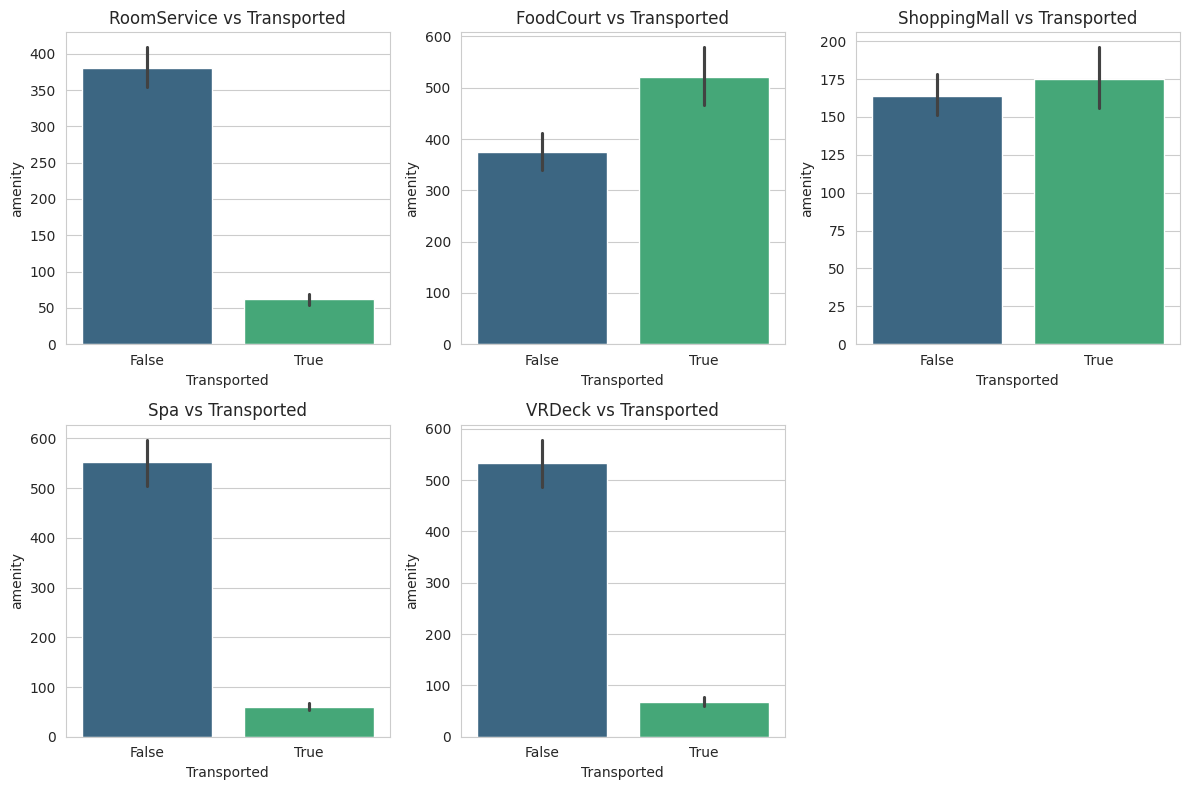

In [28]:
#Amenities usage and transported
plt.figure(figsize=(12, 8))
for i, amenity in enumerate (amenities, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='Transported', y=amenity, data=train, palette='viridis')
    plt.title(f'{amenity} vs Transported')
    plt.xlabel('Transported')
    plt.ylabel('amenity')
plt.tight_layout()
plt.show()